# STORY TITLING USING NLP

**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Libraries**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import re

**Loading Dataset**

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/storydataset.xlsx')
data.head()

,S.NO,STORY,STORY NAME
0,1,"Once, there was a boy who became bored when he...",The Boy Who Cried Wolf
1,2,There once was a king named Midas who did a go...,The Golden Touch
2,3,"One day, a fox became very hungry as he went t...",The Fox and the Grapes
3,4,"Once upon a time, in a desert far away, there ...",The Proud Rose
4,5,"One day, Molly the milkmaid had filled her pai...",The Milkmaid and Her Pail


**Data PreProcessing**

In [ ]:
data = data.drop(["S.NO"],axis = 1)

In [ ]:
x = data['STORY']
y = data['STORY NAME']

In [ ]:
def text_cleaner(text):
    newString = text.lower()
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)   
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    newString = re.sub("  "," ",newString)
    return newString

In [ ]:
cleaned_x = []
for t in x:
    cleaned_x.append(text_cleaner(t))
cleaned_x[0]  

'once there was a boy who became bored when he watched over the village sheep grazing on the hillside to entertain himself he sang out  wolf wolf the wolf is chasing the sheep when the villagers heard the cry they came running up the hill to drive the wolf away but when they arrived they saw no wolf the boy was amused when seeing their angry faces don t scream wolf boy  warned the villagers  when there is no wolf  they angrily went back down the hill later the shepherd boy cried out once again  wolf wolf the wolf is chasing the sheep  to his amusement he looked on as the villagers came running up the hill to scare the wolf away as they saw there was no wolf they said strictly  save your frightened cry for when there really is a wolf don t cry wolf when there is no wolf  but the boy grinned at their words while they walked grumbling down the hill once more later the boy saw a real wolf sneaking around his flock alarmed he jumped on his feet and cried out as loud as he could  wolf wolf  

In [ ]:
cleaned_y = []
for t in y:
    cleaned_y.append(text_cleaner(t))
cleaned_y[0] 

'the boy who cried wolf'

In [ ]:
x=cleaned_x
y=cleaned_y

In [ ]:
max_len_story=max(len(t) for t in x)
max_len_title=max(len(t) for t in y)
print(max_len_story)
print(max_len_title)

4144
42


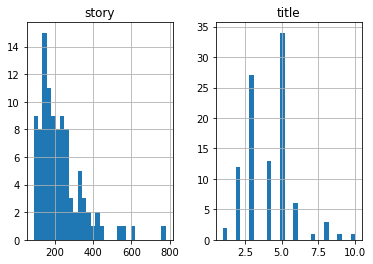

In [ ]:
import matplotlib.pyplot as plt
story_word_count = []
title_word_count = []

# populate the lists with sentence lengths
for i in x:
      story_word_count.append(len(i.split()))

for i in y:
      title_word_count.append(len(i.split()))

length_df = pd.DataFrame({'story':story_word_count, 'title':title_word_count})
length_df.hist(bins = 30)
plt.show()

**Splitting the Data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

**Tokenizing**

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

In [ ]:
def encoding(t):
  enc = tokenizer.encode(t)
  return enc

In [ ]:
#story in encoding
x_enc=[]
for t in x_train:
  x_enc.append(encoding(t))

print(x_enc[5])
x_train=x_enc

x2_enc=[]
for t in x_test:
  x2_enc.append(encoding(t))

x_test=x2_enc

Token indices sequence length is longer than the specified maximum sequence length for this model (565 > 512). Running this sequence through the model will result in indexing errors


[101, 1107, 170, 1353, 5118, 2077, 1210, 27031, 1296, 3489, 1108, 1104, 170, 1472, 5922, 1894, 2221, 1105, 3431, 1870, 1720, 1180, 2767, 1172, 1141, 1285, 1103, 2221, 3489, 1108, 5947, 1601, 1106, 1103, 3085, 1105, 22696, 18993, 2037, 9294, 1122, 1110, 1159, 1106, 3489, 1107, 1103, 5118, 1103, 27031, 1121, 1103, 2186, 1156, 1138, 188, 20236, 1306, 1303, 1111, 7722, 1104, 2094, 1519, 188, 1301, 5339, 4911, 1103, 4472, 2221, 3489, 18065, 1112, 1976, 1112, 1122, 1180, 1106, 1157, 1168, 1160, 2053, 5113, 5113, 178, 1198, 22696, 18993, 2037, 1152, 1132, 3693, 1106, 3963, 3489, 1107, 1142, 5118, 4911, 1195, 1538, 11231, 1106, 1103, 3429, 1104, 1103, 2186, 1111, 4911, 9294, 1115, 188, 1155, 1268, 1152, 2010, 189, 3963, 1143, 1112, 1821, 1315, 3613, 1111, 1172, 1145, 1195, 1138, 1155, 1103, 2094, 1195, 1444, 1303, 1163, 1103, 1894, 3489, 1133, 1195, 1431, 1198, 1301, 1111, 170, 1285, 1163, 1103, 2221, 3489, 178, 5340, 1114, 1103, 2221, 3489, 1142, 1110, 1313, 1133, 1195, 1444, 1106, 2215, 2914

In [ ]:
#story in encoding
y_enc=[]
for t in y_train:
  y_enc.append(encoding(t))

print(y_enc[5])
y_train=y_enc

y2_enc=[]
for t in y_test:
  y2_enc.append(encoding(t))

y_test=y2_enc

[101, 1103, 8144, 1104, 1210, 27031, 102]


In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_preprocessing.sequence import pad_sequences
#padding zero upto maximum length
x_train    =   pad_sequences(x_train,  maxlen=max_len_story, padding='post') 
x_test   =   pad_sequences(x_test, maxlen=max_len_story, padding='post')

x_voc_size   =  len(tokenizer.get_vocab()) +1

In [ ]:
#padding zero upto maximum length
y_train    =   pad_sequences(y_train, maxlen=max_len_title, padding='post')
y_test   =   pad_sequences(y_train, maxlen=max_len_title, padding='post')

y_voc_size  =   len(tokenizer.get_vocab()) +1

**Building the model**

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional,Attention
from tensorflow.keras.models import Model

In [ ]:
from keras import backend as K 
K.clear_session() 
latent_dim = 15

# Encoder 
encoder_inputs = Input(shape=(max_len_story,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attention =Attention()
attn_out = attention([encoder_outputs, decoder_outputs])

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4144)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 4144, 15)     434955      ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 4144, 15),   1860        ['embedding[0][0]']              
                                 (None, 15),                                                      
                                 (None, 15)]                                                      
                                                                                              

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
history=model.fit([x_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:] ,epochs=15,callbacks=[es],batch_size=20, validation_data=([x_test,y_test[:,:-1]], y_test.reshape(y_test.shape[0],y_test.shape[1], 1)[:,1:]))

Epoch 1/15


ValueError: ignored

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
            if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(len(x_val)):
  print("Review:",seq2text(x_val[i]))
  print("Original summary:",seq2summary(y_val[i]))
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
  print("\n")